In [1]:
#K-NN 

from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/0.MKCE/Datasets/Social_Network_Ads.csv")

In [3]:
df=pd.get_dummies(df)

In [4]:
x=df.drop(['Purchased'],axis=1)

In [5]:
y=df['Purchased'].values

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [7]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [8]:
#Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [9]:
#predicting the test set results
y_pred=classifier.predict(x_test)

In [10]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.93

In [11]:
#making confusion matrix
confusion_matrix(y_test,y_pred)

array([[65,  3],
       [ 4, 28]])

In [12]:
#classification report
z=classification_report(y_test,y_pred)
print(z) 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        68
           1       0.90      0.88      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [13]:
#for computing Receiver operating characteristics
from sklearn.metrics import roc_curve
#for computing area under curve
from sklearn.metrics import roc_auc_score

In [14]:
#visualizing the ROC-AUC curve
y_proba=classifier.predict_proba(x_test)

#we take the predicted values of class 1
y_predicted=y_proba[:,1]

#we check to see if the right values have been considered from the predicted values
print(y_predicted)

[0.2 0.  0.2 0.  0.  0.  0.  1.  0.  0.8 0.  0.  0.2 0.4 0.  0.4 0.2 0.
 0.8 0.  0.  1.  0.  0.6 0.  1.  0.  0.  0.  0.2 0.  0.4 0.8 0.  0.  0.
 0.  0.  0.  1.  0.  0.  0.  0.  0.6 0.  0.  1.  0.  0.8 0.8 0.  0.  1.
 1.  1.  0.2 0.  0.6 0.  0.  0.8 0.  0.6 0.  0.8 0.  0.  0.  0.2 1.  0.
 0.  1.  0.  0.  0.  0.2 0.8 0.6 0.8 1.  0.  0.  0.6 0.2 0.2 0.8 0.6 0.
 0.2 0.6 0.  0.  0.  0.2 0.  0.4 0.6 0.8]


In [15]:
#using roc_curve() to generate fpr & tpr values
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [16]:
#passing the fpr&tpr values to auc()to calculate the area under curve
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.9590992647058824


Text(0, 0.5, 'True Positive Rate(Sensitivity)')

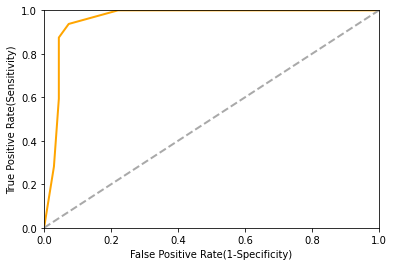

In [17]:
#plotting the ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
